Automatically created module for IPython interactive environment
Opening raw data file C:\Users\Nemes\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 4505  =      0.000 ...    30.003 secs...
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Client: Waiting for server to start
Looking for LSL stream mne_stream...
mne_stream not found in streams: []
Looking for LSL stream mne_stream...
Found stream 'MNE' via mne_stream...
Client: Connected
Got epoch 1/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an S

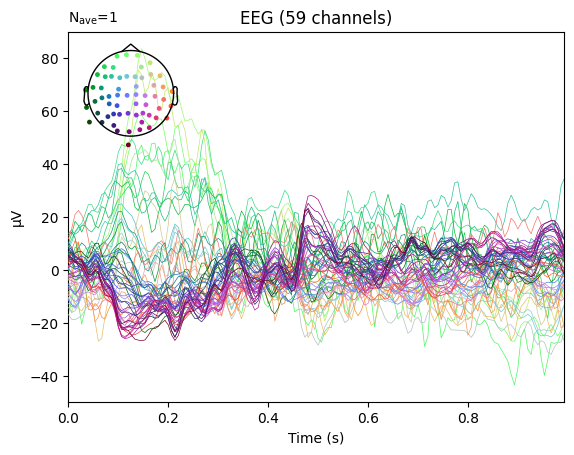

Got epoch 2/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


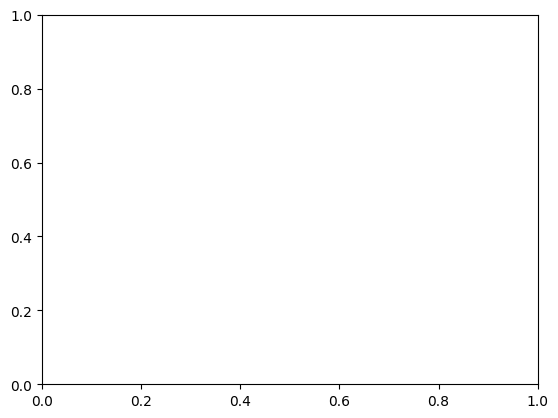

Got epoch 3/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


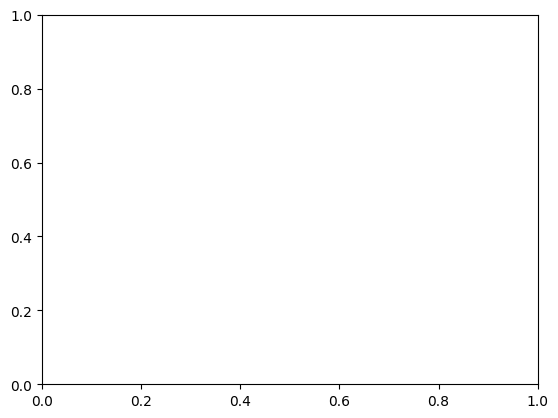

Got epoch 4/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


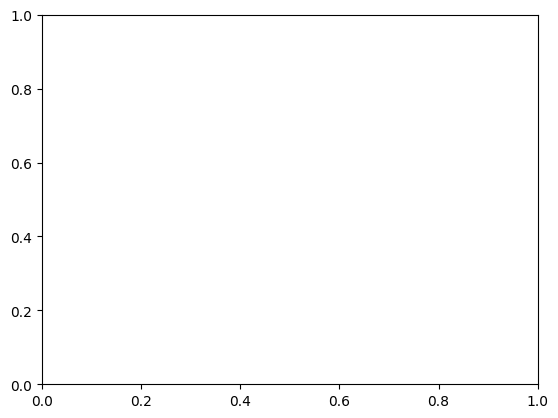

Got epoch 5/5
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


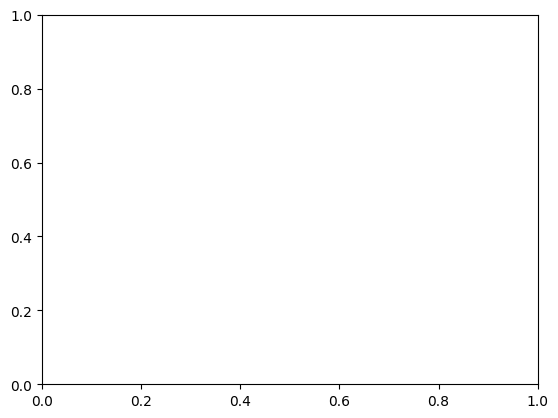

Streams closed


<Figure size 640x480 with 0 Axes>

In [5]:
# Author: Teon Brooks <teon.brooks@gmail.com>
#
# License: BSD (3-clause)
import matplotlib.pyplot as plt

from mne.datasets import sample
from mne.io import read_raw_fif

from mne_realtime import LSLClient, MockLSLStream

print(__doc__)

# this is the host id that identifies your stream on LSL
host = 'mne_stream'
# this is the max wait time in seconds until client connection
wait_max = 5


# Load a file to stream raw data
data_path = sample.data_path()
raw_fname = data_path  / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = read_raw_fif(raw_fname).crop(0, 30).load_data().pick('eeg')

# For this example, let's use the mock LSL stream.
_, ax = plt.subplots(1)
n_epochs = 5

# main function is necessary here to enable script as own program
# in such way a child process can be started (primarily for Windows)
if __name__ == '__main__':
    with MockLSLStream(host, raw, 'eeg'):
        with LSLClient(info=raw.info, host=host, wait_max=wait_max) as client:
            client_info = client.get_measurement_info()
            sfreq = int(client_info['sfreq'])

            # let's observe ten seconds of data
            for ii in range(n_epochs):
                print('Got epoch %d/%d' % (ii + 1, n_epochs))
                plt.cla()
                epoch = client.get_data_as_epoch(n_samples=sfreq)
                epoch.average().plot(axes=ax)
                plt.pause(1.)
            plt.draw()
print('Streams closed')